# Tout début du code (prof)
# Import des données

In [1]:
Xtrain = read.csv("raw data/XtrainDfInterpolatedFilteredWithoutIndex.csv",sep=",",header=TRUE)

attach(Xtrain)
head(Xtrain[,1:5])
n_train = nrow(Xtrain)
Ytrain = read.csv("raw data/Ytrain.csv",sep=";",header=TRUE)
dim(Ytrain)
Xtest = read.csv("raw data/XtestDfInterpolatedFilteredWithoutIndex.csv",sep=",",header=TRUE)
head(Xtest[,1:5])
n_test = nrow(Xtest)

,date,hour,day,month,isPublicHollyday
1,2015-01-28 03,3,2,1,0
2,2015-01-28 04,4,2,1,0
3,2015-01-28 05,5,2,1,0
4,2015-01-28 06,6,2,1,0
5,2015-01-28 07,7,2,1,0
6,2015-01-28 08,8,2,1,0


[1] 4031   96

,date,hour,day,month,isPublicHollyday
1,2015-02-27 02,2,4,2,0
2,2015-02-27 03,3,4,2,0
3,2015-02-27 04,4,4,2,0
4,2015-02-27 05,5,4,2,0
5,2015-02-27 06,6,4,2,0
6,2015-02-27 07,7,4,2,0


# Transformation des dates et représentation
## as.POSIXct

In [44]:
date_train <- sapply(strsplit(as.character(Xtrain[,1]), " "), "[", 1)
head(date_train)
date_train = as.POSIXct(Xtrain$date,format='%Y-%m-%d')

date_test =  sapply(strsplit(as.character(Xtest[,1]), " "), "[", 1)
date_test = as.POSIXct(Xtest$date,format='%Y-%m-%d')#(Xtest[,1])
head(date_test)

[1] "2015-01-28" "2015-01-28" "2015-01-28" "2015-01-28" "2015-01-28"
[6] "2015-01-28"

[1] "2015-02-27 CET" "2015-02-27 CET" "2015-02-27 CET" "2015-02-27 CET"
[5] "2015-02-27 CET" "2015-02-27 CET"

## Répartition des dates entre train et test

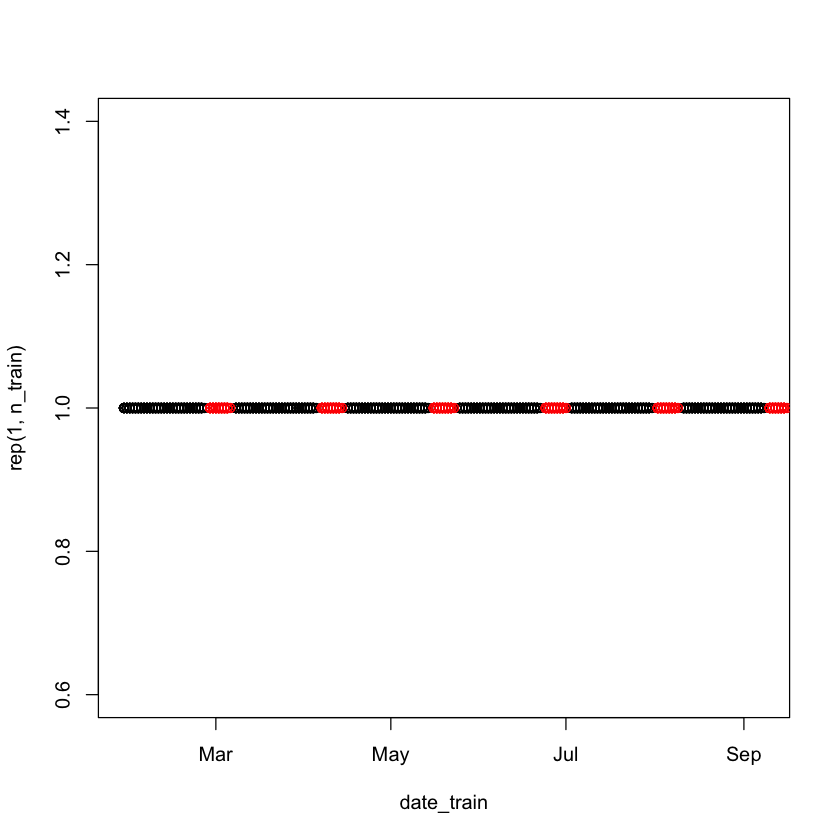

In [48]:
plot(date_train, rep(1,n_train))
points(date_test, rep(1,n_test),col="red")
#date_train[1:100]

# Sur les Y
## Il y a 4032 observations prises sur 24h de 4032/24=168 jours
## On répresente les Y des 5 premiers jours

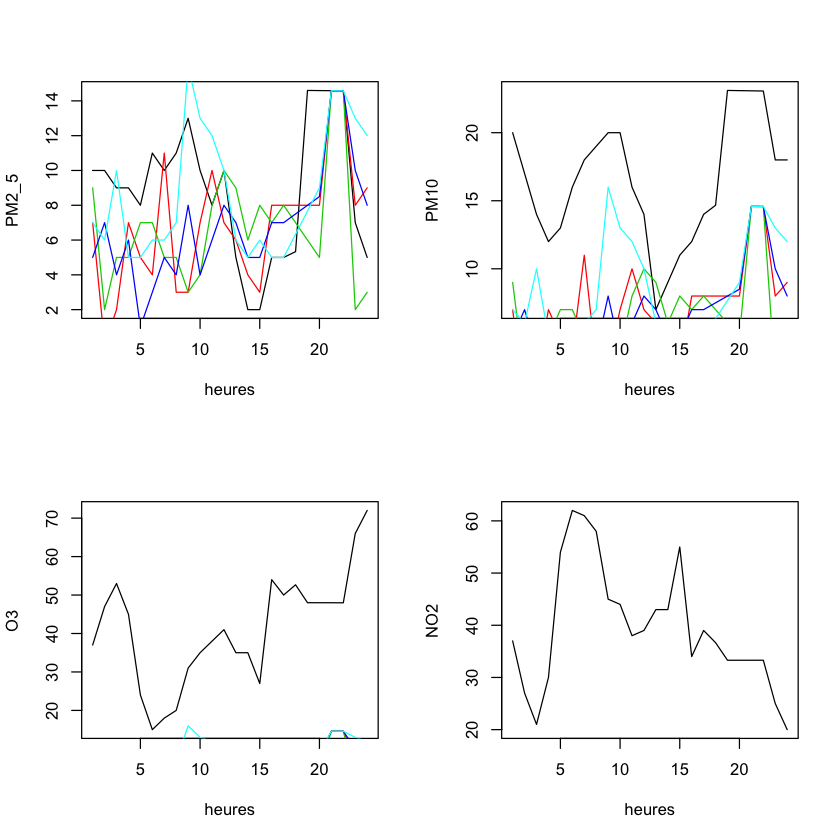

In [4]:
par(mfrow=c(2,2))
plot(1:24,Ytrain[1,1:24],type="l",xlab="heures", ylab="PM2_5")
for (k in 2:5){
  lines(c(1:24),Ytrain[((24*k)+1),(1:24)],type="l",col=k)
}

plot(1:24,Ytrain[1,25:48],type="l",xlab="heures", ylab="PM10")
for (k in 2:5){
  lines(c(1:24),Ytrain[((24*k)+1),(1:24)],type="l",col=k)
}

plot(1:24,Ytrain[1,49:72],type="l",xlab="heures", ylab="O3")
for (k in 2:5){
  lines(c(1:24),Ytrain[((24*k)+1),(1:24)],type="l",col=k)
}

plot(1:24,Ytrain[1,73:96],type="l",xlab="heures",ylab="NO2")
for (k in 2:5){
  lines(c(1:24),Ytrain[((24*k)+1),(1:24)],type="l",col=k)
}

# On commence par la 1ere colonne de PM2_5
## Histogramme

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


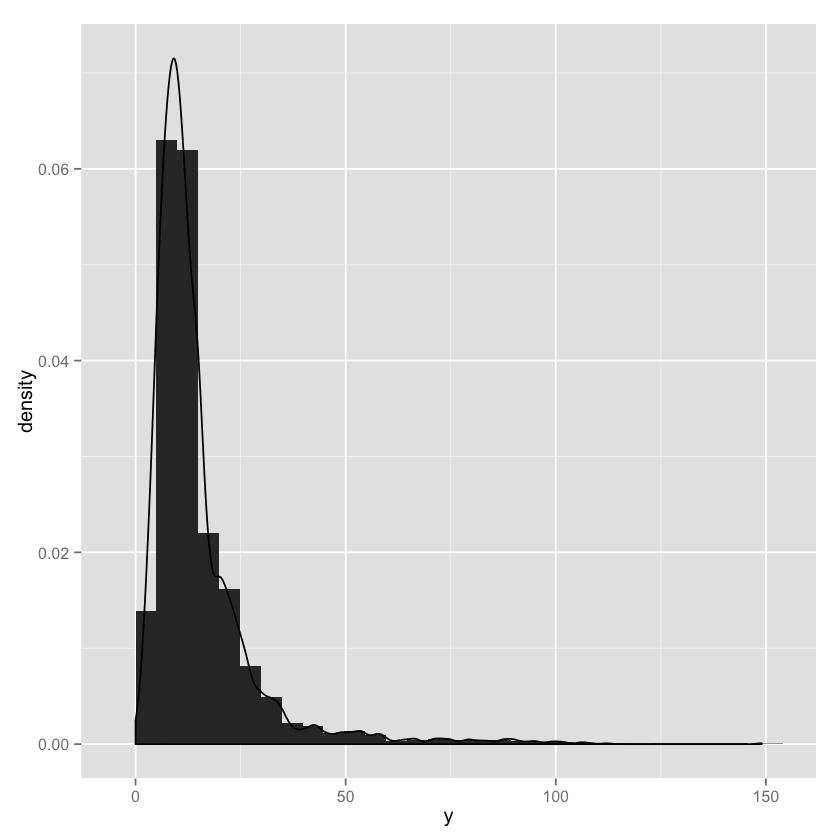

In [6]:
library(ggplot2)
heure =as.factor(Xtrain[,3])
jour =as.factor(Xtrain[,4])
df = data.frame(jour = jour,  heure = heure, y =as.numeric(Ytrain[,1]))#,25,49,73)])

m <- ggplot(df, aes(x=y))+geom_histogram(aes(y = ..density..))+geom_density()
plot(m)

## Il faut transformer Y avec log

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


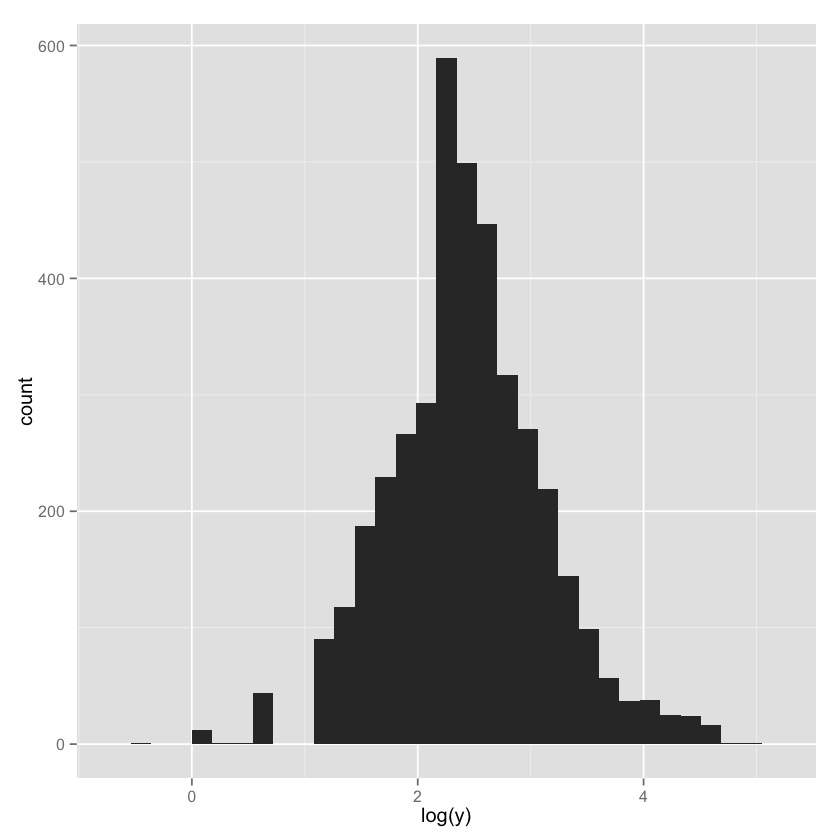

In [7]:
m <- ggplot(df, aes(x=log(y)))+geom_histogram()
plot(m)

## Y a t il un effet jour ?

Warning message:
: Removed 5 rows containing non-finite values (stat_boxplot).

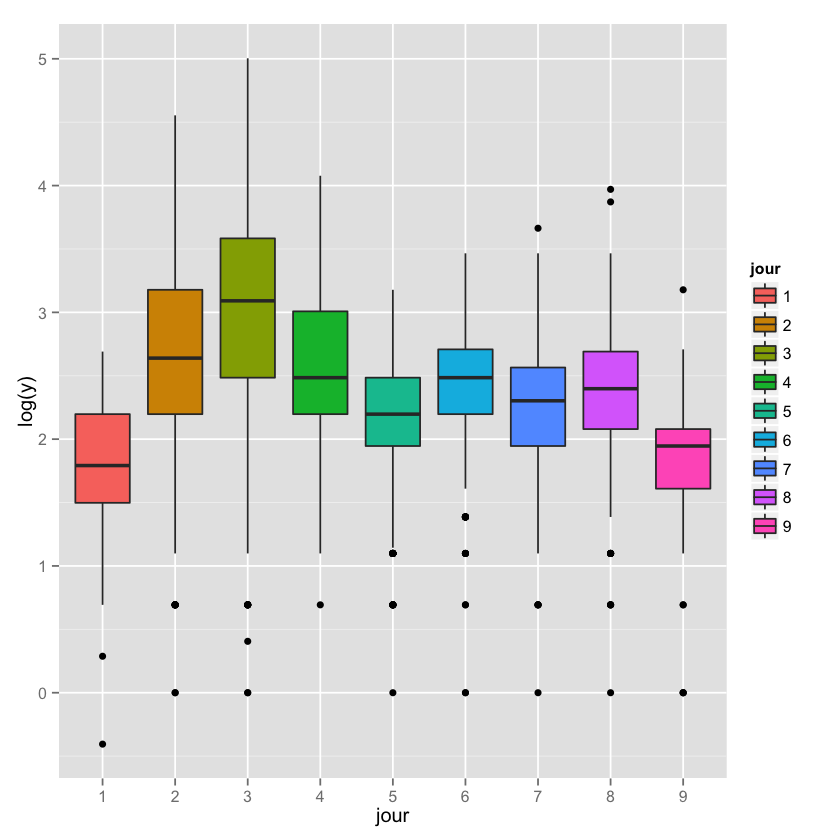

In [9]:
ggplot(df, aes(x = jour, y = log(y), fill=jour)) +
geom_boxplot() 

## Y a t il un effet heure ?

Warning message:
: Removed 5 rows containing non-finite values (stat_boxplot).

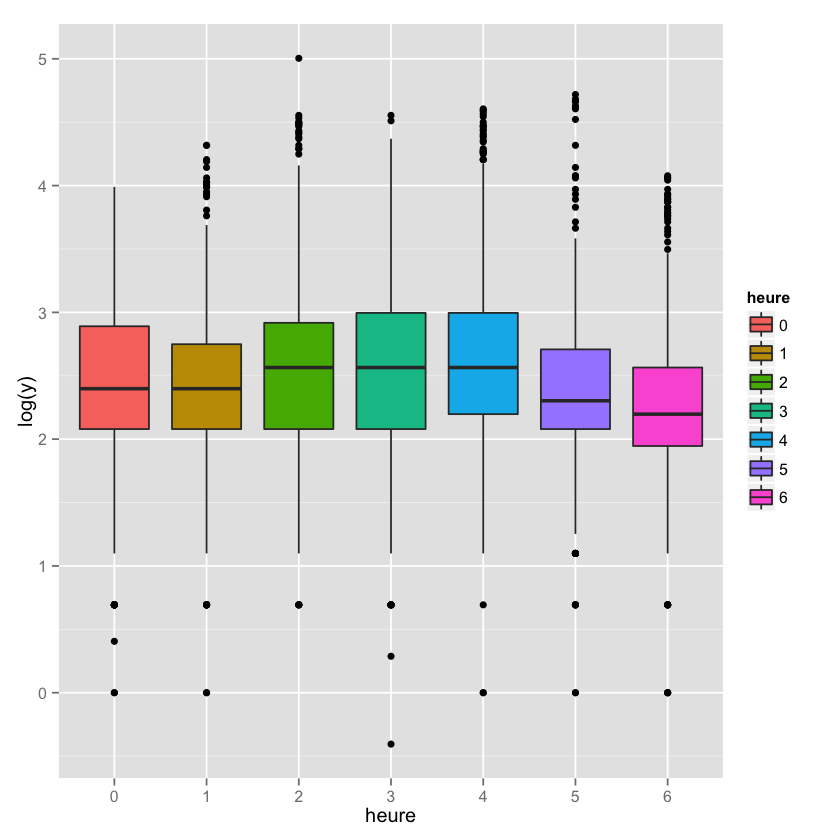

In [10]:
ggplot(df, aes(x = heure, y = log(y), fill=heure)) +
geom_boxplot() 

# On commence par la 1ere colonne de PM10
## Histogramme

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


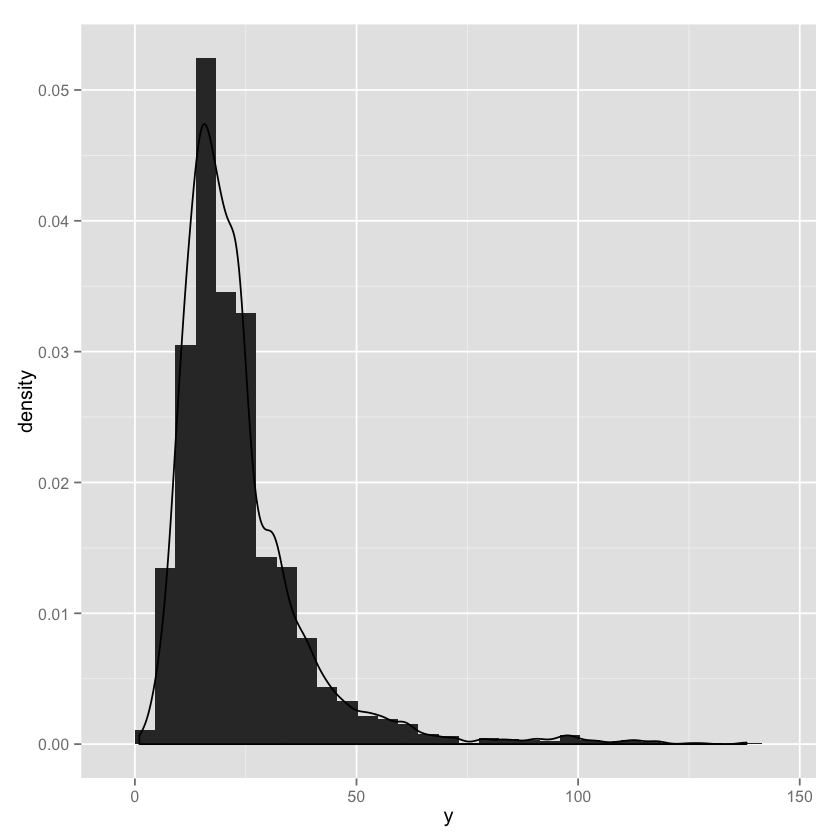

In [11]:
df = data.frame(jour = jour,heure = heure, y =as.numeric(Ytrain[,25]))#,25,49,73)])

m <- ggplot(df, aes(x=y))+geom_histogram(aes(y = ..density..))+geom_density()
plot(m)

## Il faut transformer Y avec log

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


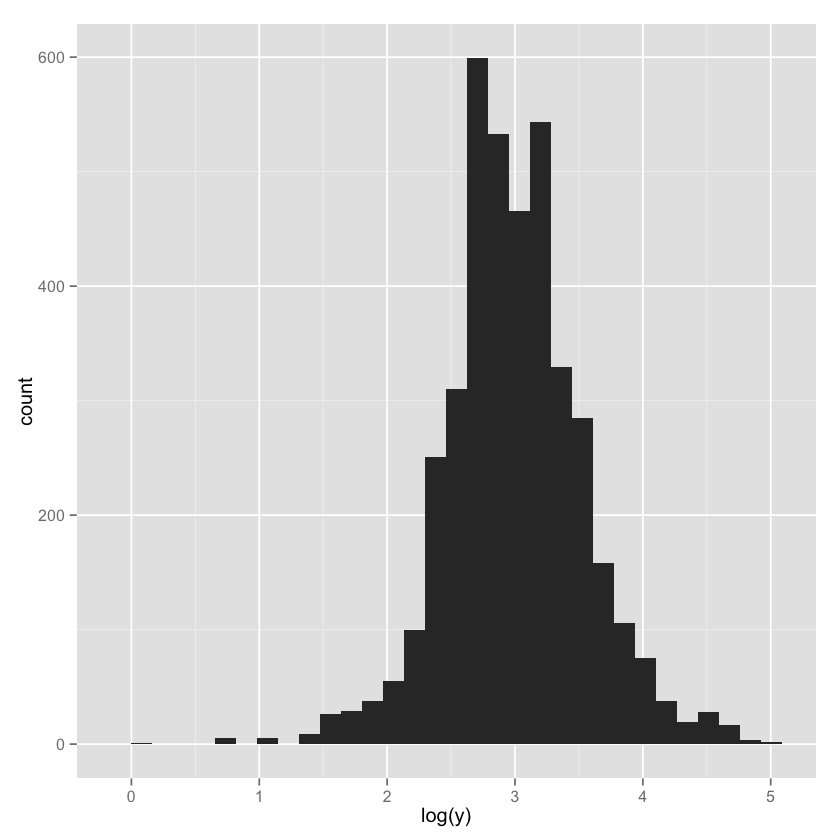

In [12]:
m <- ggplot(df, aes(x=log(y)))+geom_histogram()
plot(m)

## Y a t il un effet jour ?

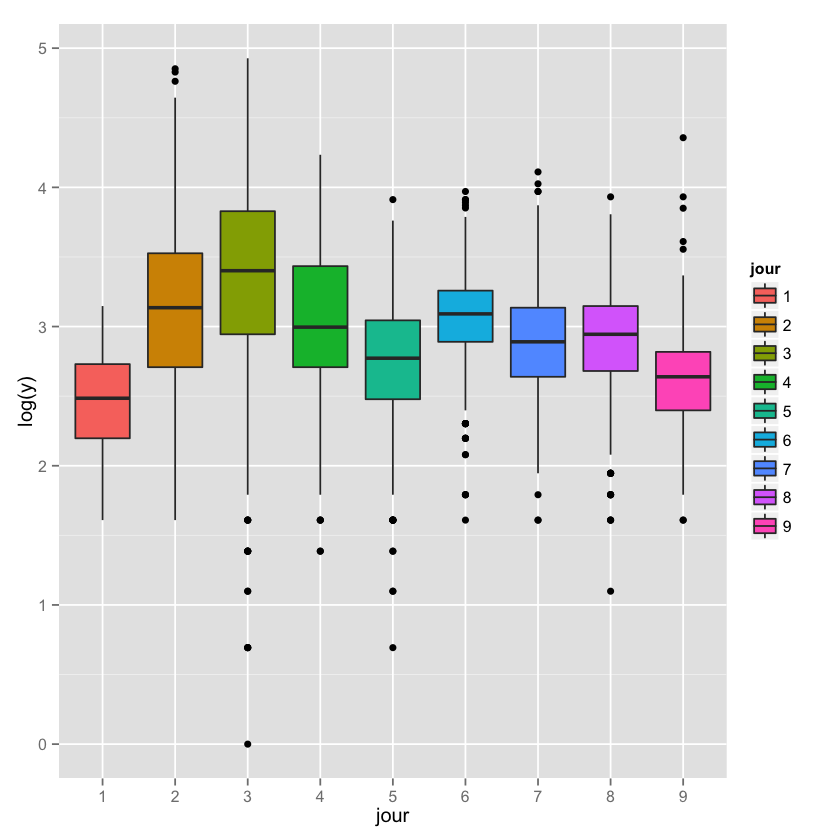

In [13]:
ggplot(df, aes(x = jour, y = log(y), fill=jour)) +
geom_boxplot() 

## Y a t il un effet heure ?

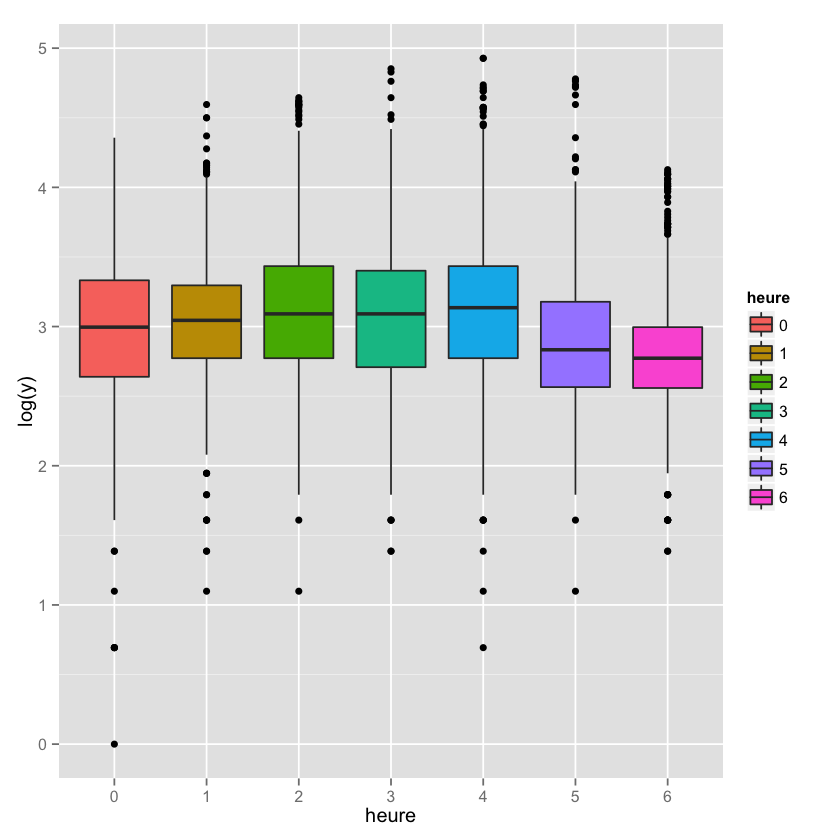

In [15]:
ggplot(df, aes(x = heure, y = log(y), fill=heure)) +
geom_boxplot() 

# On commence par la 1ere colonne de O3
## Histogramme

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


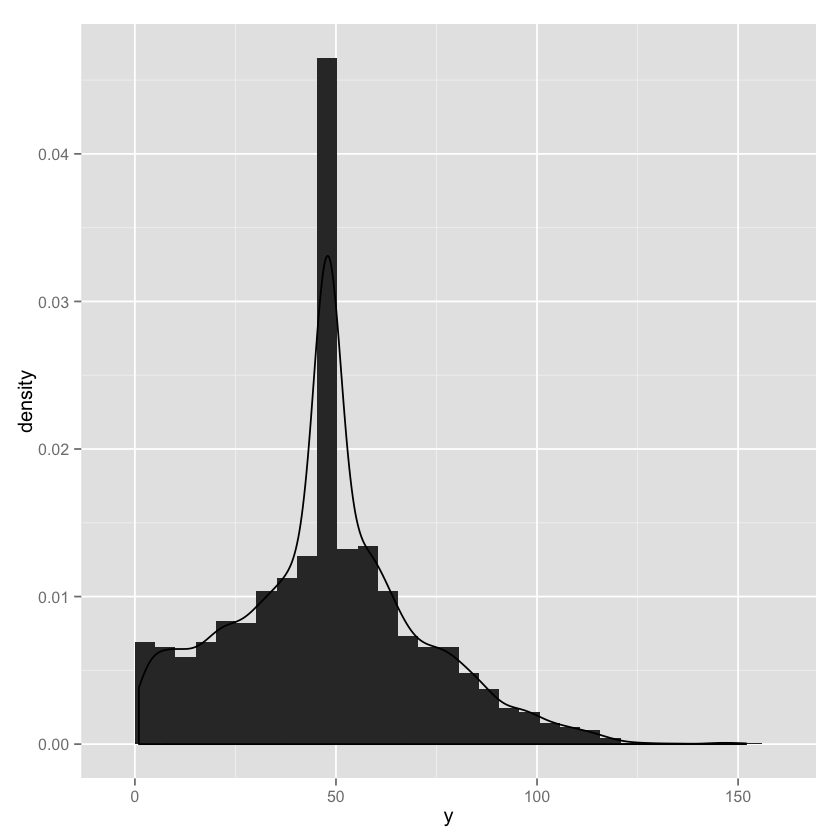

In [16]:
df = data.frame(jour=jour,heure = heure, y =as.numeric(Ytrain[,49]))#,25,49,73)])

m <- ggplot(df, aes(x=y))+geom_histogram(aes(y = ..density..))+geom_density()
plot(m)

## Y a t il un effet jour ?

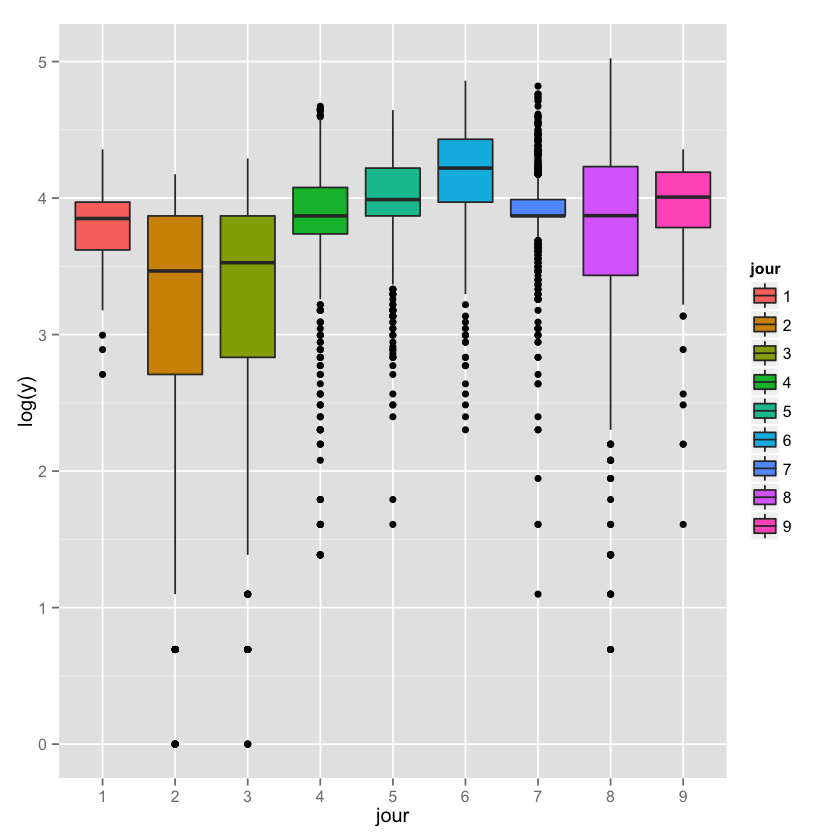

In [17]:
ggplot(df, aes(x = jour, y = log(y), fill=jour)) +
geom_boxplot() 

## Y a t il un effet heure ?

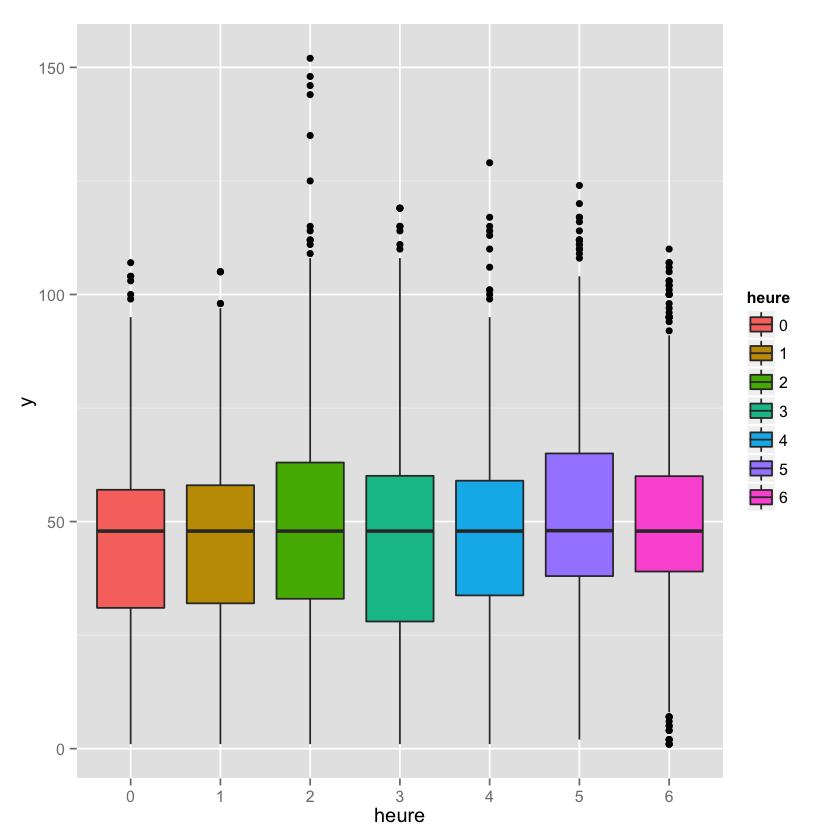

In [18]:
ggplot(df, aes(x = heure, y = y, fill=heure)) +
geom_boxplot() 

# On commence par la 1ere colonne de NO3
## Histogramme

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


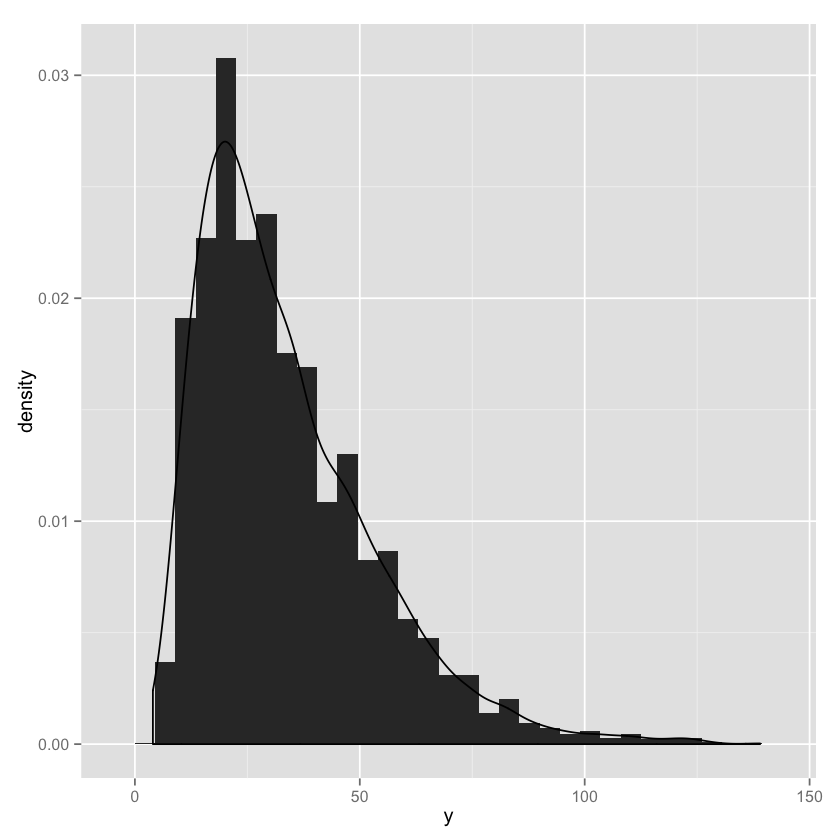

In [19]:
df = data.frame(heure = heure, y =as.numeric(Ytrain[,73]))#,25,49,73)])

m <- ggplot(df, aes(x=y))+geom_histogram(aes(y = ..density..))+geom_density()
plot(m)

## Il faut transformer Y avec log

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


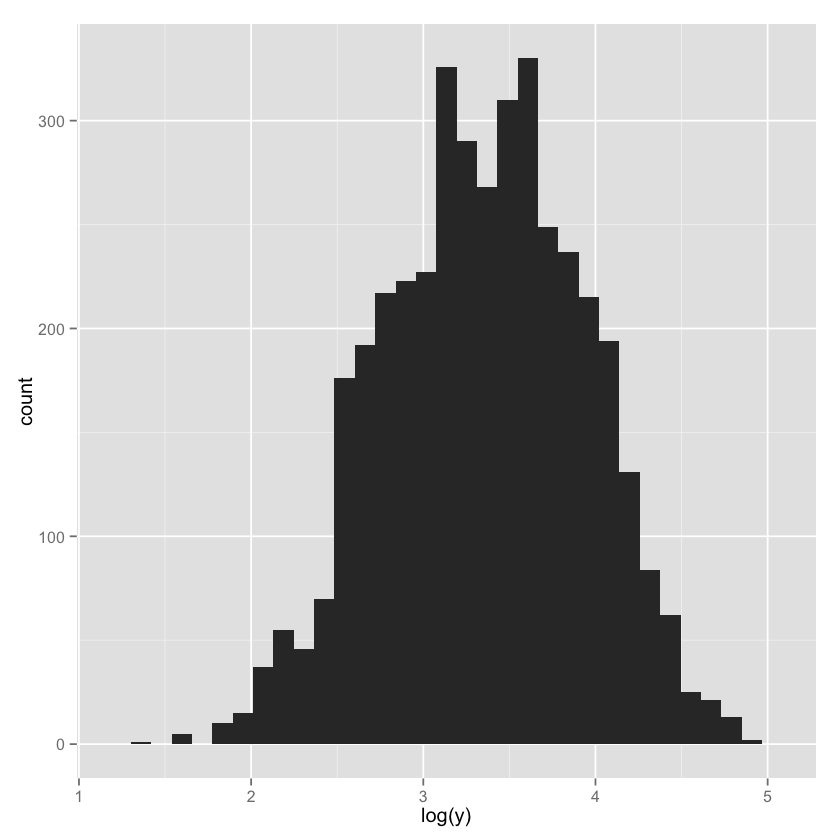

In [20]:
m <- ggplot(df, aes(x=log(y)))+geom_histogram()
plot(m)

## Y a t il un effet jour ?

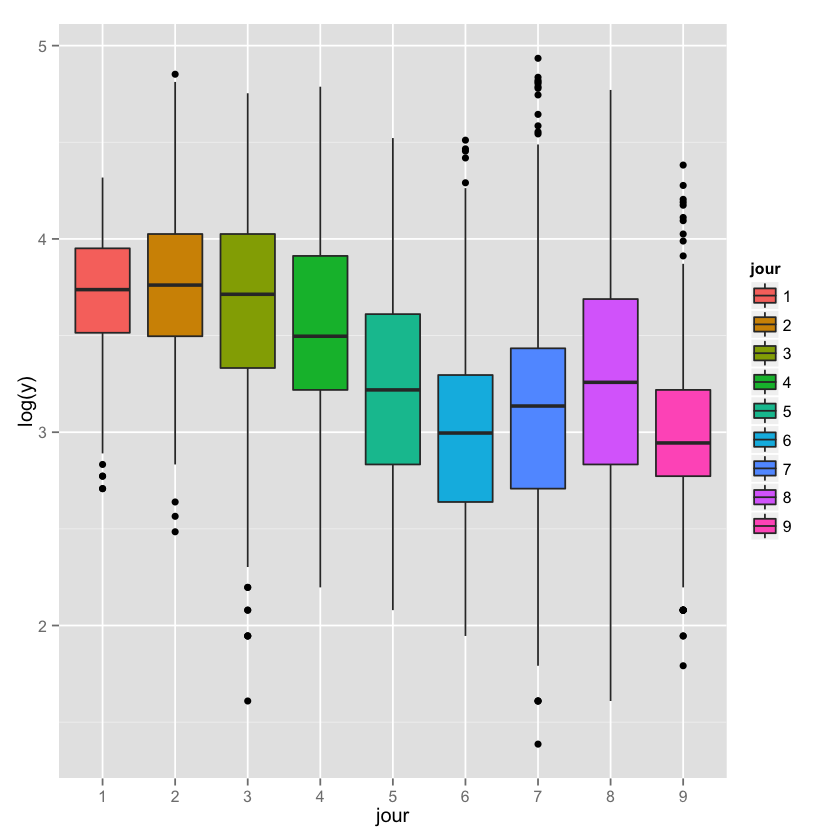

In [21]:
ggplot(df, aes(x = jour, y = log(y), fill=jour)) +
geom_boxplot()

## Y a t il un effet heure ?

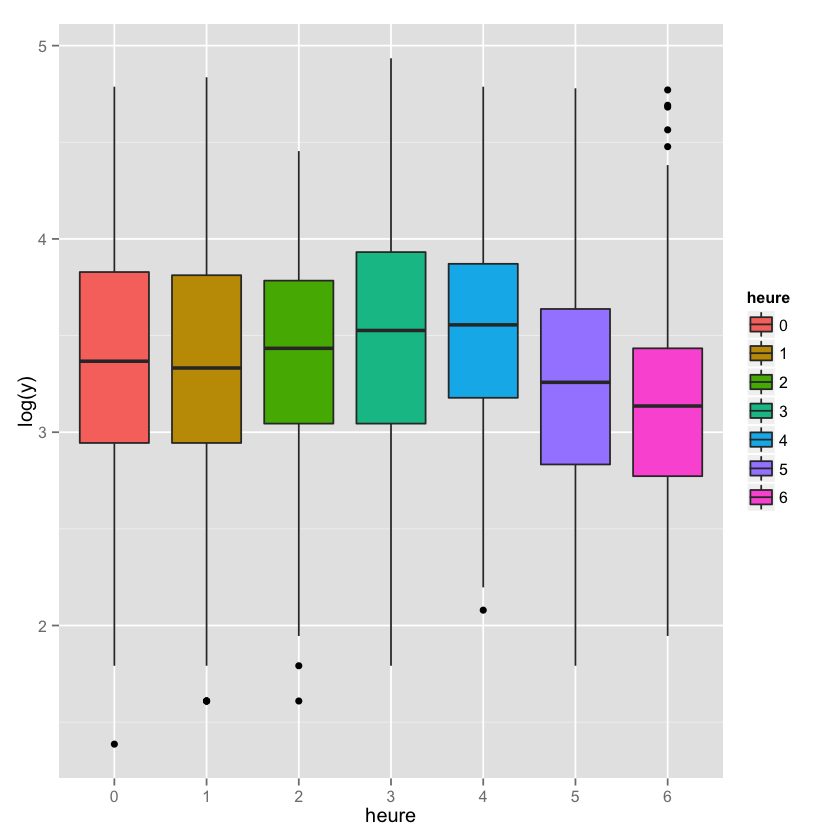

In [22]:
ggplot(df, aes(x = heure, y = log(y), fill=heure)) +
geom_boxplot() 

# Comment construire un jeu de données de test factice ?
## Aléatoirement

In [23]:
s = sample(c(1:n_train))
Xtrain_train = Xtrain[s <= 3000,]
Xtrain_test = Xtrain[s > 3000,]

Ytrain_train = Ytrain[s <= 3000,]
Ytrain_test = Ytrain[s > 3000,]

## En choissant des jours en particulier
### Il faut comprendre comment le (vrai) test a été construit !

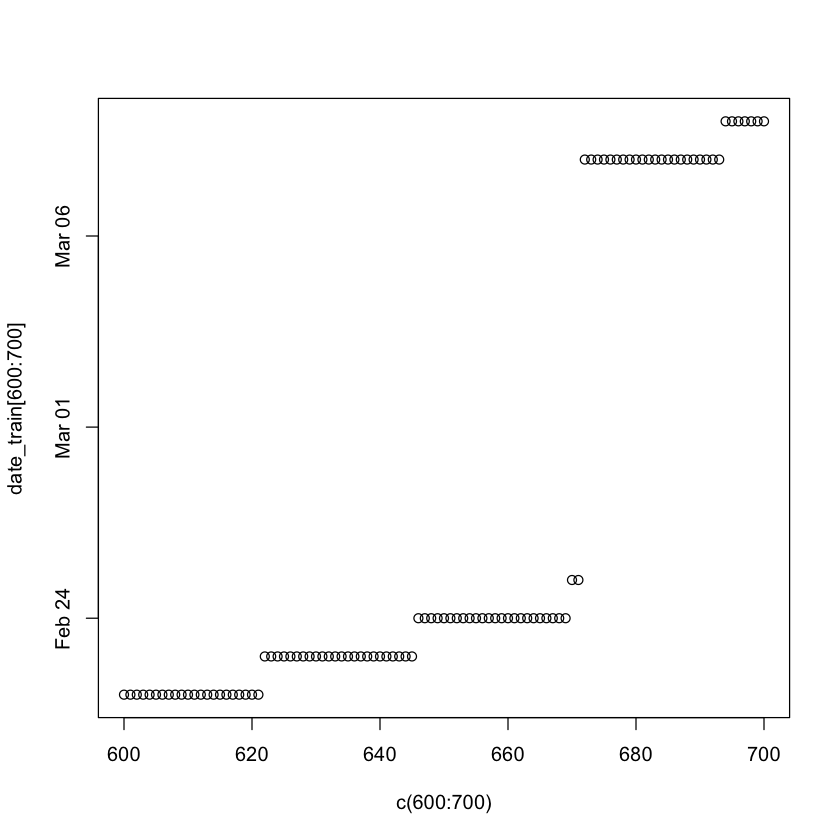

[1]  671 1343 2015 2687 3359

[1] 672 672 672 672

[1] "2015-02-24 CET" "2015-02-24 CET" "2015-02-24 CET" "2015-02-24 CET"
[5] "2015-02-24 CET" "2015-02-25 CET" "2015-02-25 CET"

 [1] "2015-02-27 CET" "2015-02-27 CET" "2015-02-27 CET" "2015-02-27 CET"
 [5] "2015-02-27 CET" "2015-02-27 CET" "2015-02-27 CET" "2015-02-27 CET"
 [9] "2015-02-27 CET" "2015-02-27 CET"

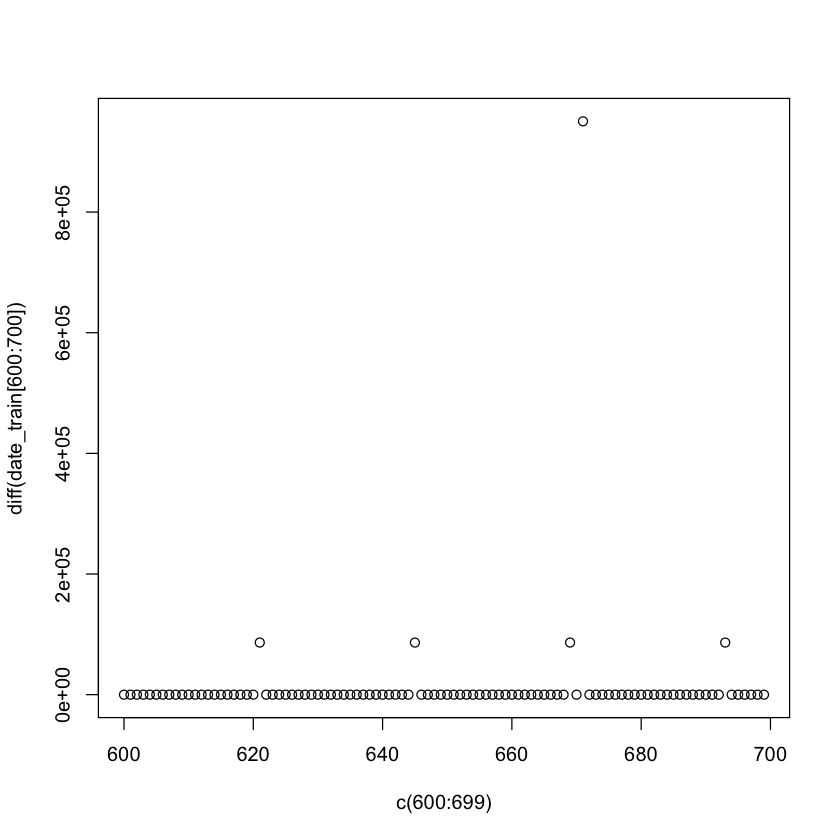

In [49]:
plot(c(600:700),date_train[600:700])
plot(c(600:699),diff(date_train[600:700]))
which(diff(date_train)==950400)
diff(which(diff(date_train)==950400))
date_train[665:671]
date_test[1:10]

# Une piste : peut-être commencer par expliquer la moyenne des PM2_5, des PM10, etc : donc 4 régressions à faire... Ajouter ensuite de façon globale ou via des régressions les ajustements jours+heures

# Pour la moyenne de PM2_5

ERROR: Error in data.frame(heure = heure, y = PM2_5): arguments imply differing number of rows: 4031, 3000


stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


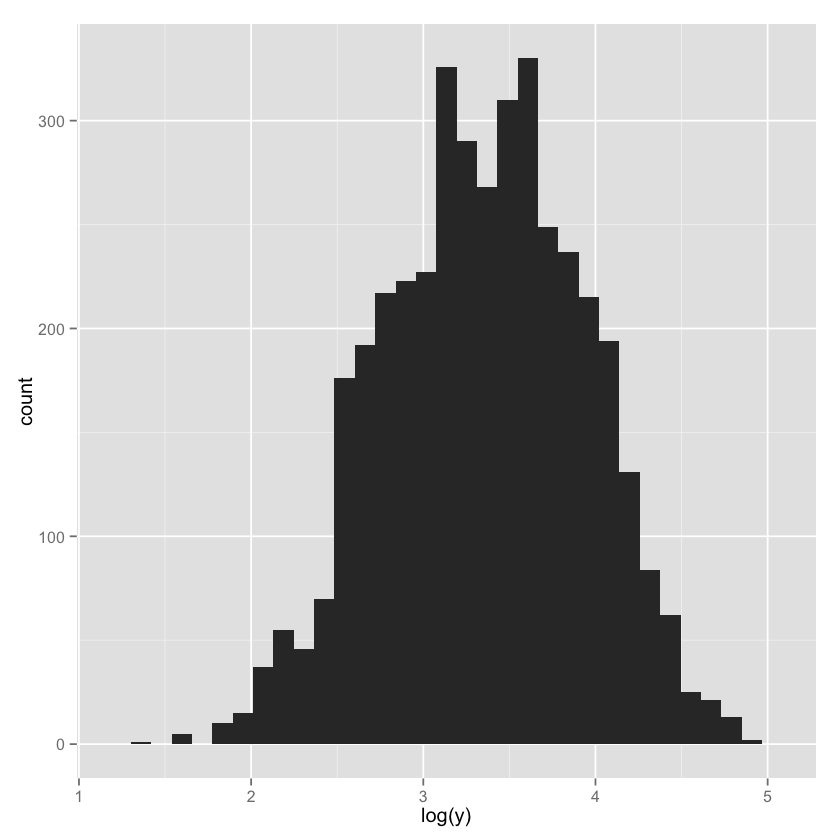

In [28]:
PM2_5 = rowMeans(log(Ytrain_train[,1:24]))
df = data.frame(heure = heure, y =PM2_5)#,25,49,73)])

m <- ggplot(df, aes(x=log(y)))+geom_histogram()
plot(m)